# <font  color = "DodgerBlue" face = "Times New Roman" size = "7"><center>DIABETES - Analysis & Prediction</font></center>

## <u>Introduction</u>📖
***Diabetes*** affects an estimated *34.2 million* people in the United States and is the seventh leading cause of death. Diabetes can affect many parts of the body and is associated with serious complications, such as heart disease and stroke, blindness, kidney failure, and lower limb amputation. In addition to increasing the risk for these complications, diabetes also doubles the risk for many forms of cancer, some forms of dementia, hearing loss, erectile dysfunction, urinary incontinence, and many other common diseases.
- **Type 1** diabetes affects approximately 5 percent of adults and the majority of children and youth with diagnosed diabetes.
- **Type 2** diabetes is the most common form of the disease, accounting for about 90 to 95 percent of diagnosed diabetes cases   in U.S. adults. Type 2 diabetes is also increasingly being diagnosed in children and adolescents, and disproportionately   affects minority youth.
- Prediabetes affects an estimated 88 million adults in the United States. Those with prediabetes are at high risk of         developing type 2 diabetes.
- Gestational diabetes affects a significant proportion of pregnant women. In addition to placing the mother and child at     risk for complications during childbirth, gestational diabetes increases the risk for eventual type 2 diabetes for both     mother and child.

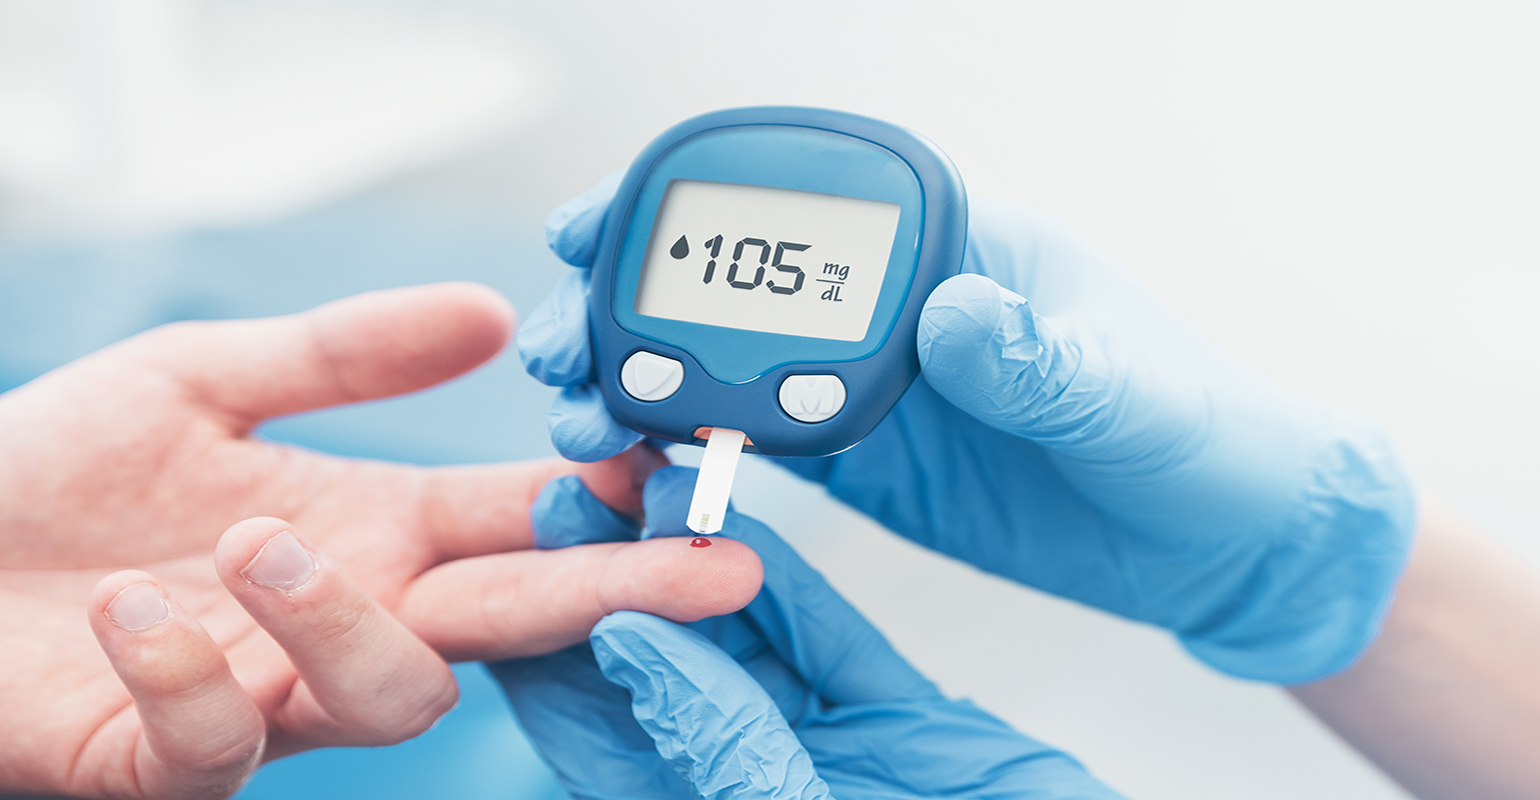

The **National Institute of Diabetes and Digestive and Kidney Diseases (NIDDK)** supports basic, clinical, and translational research to combat diabetes and its associated complications. For example, NIDDK researchers are:
- studying genetic and environmental factors that contribute to the development and progression of diabetes.
- studying ways to preserve insulin-producing cells of the pancreas.
- identifying new methods to improve blood glucose monitoring and insulin delivery in type 1 diabetes.
- examining behavioral approaches to prevent type 2 diabetes and to enhance diabetes self-management.
- conducting clinical trials testing new prevention and treatment strategies for diabetes and its complications, such as a   trial comparing different type 2 diabetes medications and trials testing ways to prevent type 1 diabetes in relatives of   people with the disease.
- uncovering the fundamental cellular and molecular pathways underlying development of diabetes and its complications to     develop new approaches to prevention and management.

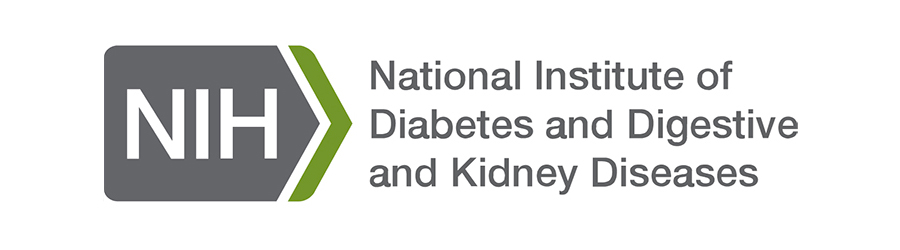

The NIDDK also administers the Special Statutory Funding Program for Type 1 Diabetes Research, which is a special appropriation dedicated to supporting research on type 1 diabetes and its complications.They also research creates knowledge about and treatments for the most chronic, costly, and consequential diseases. 

## <u>Dataset Overview & Objective</u>📝
The dataset used in this project is originally from NIDDK. The objective is to predict whether or not a patient has diabetes, based on certain diagnostic measurements included in the dataset.Build a model to accurately predict whether the patients in the dataset have diabetes or not.

| Variables      | Description |
| ----------- | ----------- |
| Pregnancies | Number of times pregnant |
| Glucose | Plasma glucose concentration in an oral glucose tolerance test |
| BloodPressure | Diastolic blood pressure *(mm Hg)* |
| SkinThickness | Triceps skinfold thickness *(mm)* |
| Insulin | Two hour serum insulin |
| BMI | Body Mass Index *(kg/m^2)*|
| DiabetesPedigreeFunction | Diabetes pedigree function |
| Age | Age in years |
| Outcome | Class variable (either 0 or 1). 268 of 768 values are 1, and the others are 0 |

## <u>Libraries & Dataset Import</u>📥
Let us now import the required libraries and dataset to do analysis and modelling.

In [7]:
#Import the relevant basic libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter
from imblearn.over_sampling import SMOTE
import warnings
import pickle
from joblib import dump
warnings.simplefilter("ignore")

In [8]:
#Import the adv ML libraries
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split,KFold, cross_val_score,GridSearchCV, StratifiedKFold
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import roc_auc_score
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import RandomForestClassifier

In [9]:
#import the dataset
diabetes = pd.read_csv("C:/Users/ruben/OneDrive/Documents/Python_DS/Projects/Healthcare_diabetes/Project 2/Healthcare - Diabetes/health_care_diabetes.csv")
diabetes.head(10)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
5,5,116,74,0,0,25.6,0.201,30,0
6,3,78,50,32,88,31.0,0.248,26,1
7,10,115,0,0,0,35.3,0.134,29,0
8,2,197,70,45,543,30.5,0.158,53,1
9,8,125,96,0,0,0.0,0.232,54,1


In [10]:
diabetes.shape

(768, 9)

## <u>Exploratory Data Analysis(EDA)</u>📈
Let us have a look at the structure of the data and its datatypes.

In [11]:
diabetes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


It can be seen that there are no null values in the entire dataset. Also there are no special characters in the dataset due to just integer and float datatypes for numerical data.So let us have a look at the descriptive statistics of the dataset

In [12]:
#Descriptive stats of the data
diabetes.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


Looking at the data, we can observe that there 0 is the minimum for Pregnancies, Glucose, BloodPressure, SkinThickness, Insulin, BMI and Outcome columns. Other than Number of pregnancies and Outcomes, this value doesnt make sense for the other 5 columns. Let us further analyse these columns. 

In [13]:
#Slicing the data which has all these 5 columns values as 0
diabetes[(diabetes['Glucose']==0)]

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
75,1,0,48,20,0,24.7,0.140,22,0
182,1,0,74,20,23,27.7,0.299,21,0
342,1,0,68,35,0,32.0,0.389,22,0
349,5,0,80,32,0,41.0,0.346,37,1
502,6,0,68,41,0,39.0,0.727,41,1


In [14]:
diabetes[diabetes['BloodPressure']==0]

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
7,10,115,0,0,0,35.3,0.134,29,0
15,7,100,0,0,0,30.0,0.484,32,1
49,7,105,0,0,0,0.0,0.305,24,0
60,2,84,0,0,0,0.0,0.304,21,0
78,0,131,0,0,0,43.2,0.270,26,1
81,2,74,0,0,0,0.0,0.102,22,0
172,2,87,0,23,0,28.9,0.773,25,0
193,11,135,0,0,0,52.3,0.578,40,1
222,7,119,0,0,0,25.2,0.209,37,0
261,3,141,0,0,0,30.0,0.761,27,1


In [15]:
diabetes[(diabetes['SkinThickness']==0)]

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
2,8,183,64,0,0,23.3,0.672,32,1
5,5,116,74,0,0,25.6,0.201,30,0
7,10,115,0,0,0,35.3,0.134,29,0
9,8,125,96,0,0,0.0,0.232,54,1
10,4,110,92,0,0,37.6,0.191,30,0
...,...,...,...,...,...,...,...,...,...
757,0,123,72,0,0,36.3,0.258,52,1
758,1,106,76,0,0,37.5,0.197,26,0
759,6,190,92,0,0,35.5,0.278,66,1
762,9,89,62,0,0,22.5,0.142,33,0


In [16]:
diabetes[(diabetes['Insulin']==0)]

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
5,5,116,74,0,0,25.6,0.201,30,0
7,10,115,0,0,0,35.3,0.134,29,0
...,...,...,...,...,...,...,...,...,...
761,9,170,74,31,0,44.0,0.403,43,1
762,9,89,62,0,0,22.5,0.142,33,0
764,2,122,70,27,0,36.8,0.340,27,0
766,1,126,60,0,0,30.1,0.349,47,1


In [17]:
diabetes[(diabetes['BMI']==0)]

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
9,8,125,96,0,0,0.0,0.232,54,1
49,7,105,0,0,0,0.0,0.305,24,0
60,2,84,0,0,0,0.0,0.304,21,0
81,2,74,0,0,0,0.0,0.102,22,0
145,0,102,75,23,0,0.0,0.572,21,0
371,0,118,64,23,89,0.0,1.731,21,0
426,0,94,0,0,0,0.0,0.256,25,0
494,3,80,0,0,0,0.0,0.174,22,0
522,6,114,0,0,0,0.0,0.189,26,0
684,5,136,82,0,0,0.0,0.640,69,0


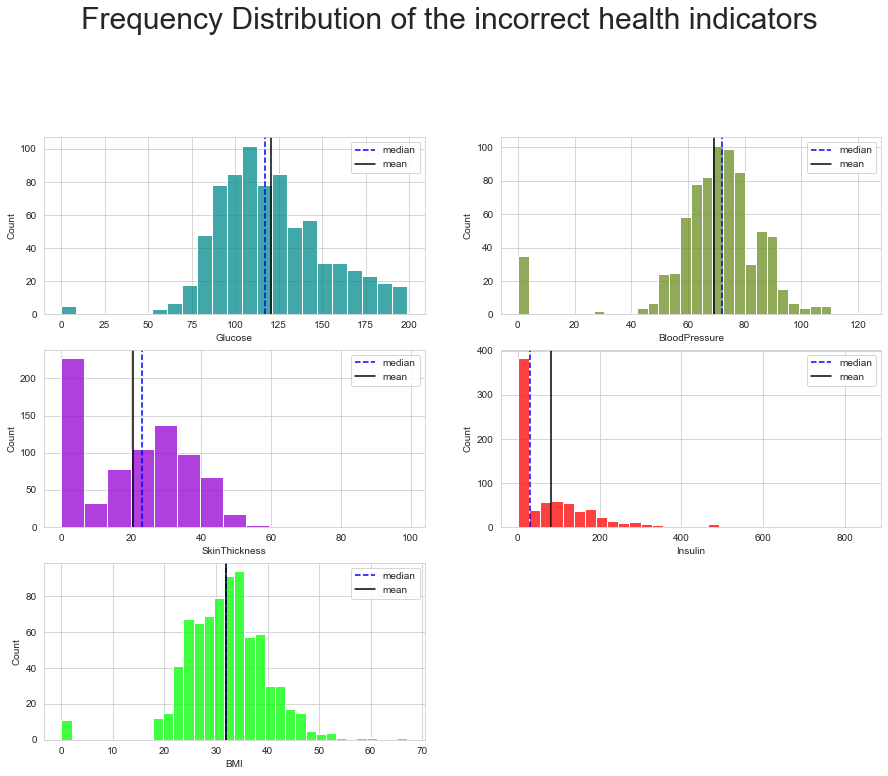

In [18]:
plt.figure(figsize = (15,15),)
sns.set_style('whitegrid')
color = ['darkcyan','olivedrab','darkviolet','red','lime']
for i in range(1,6):
    plt.subplot(4,2,i)
    sns.histplot(diabetes,x = diabetes.iloc[:,i],color = color[i-1])
    plt.axvline(x=diabetes.iloc[:,i].median(),color='blue',ls='--', lw=1.5, label = 'median')
    plt.axvline(x=diabetes.iloc[:,i].mean(),color='black', lw=1.5,label = 'mean')
    plt.legend()
plt.suptitle('Frequency Distribution of the incorrect health indicators', fontsize=30,verticalalignment = 'baseline',fontweight = 'book')
plt.show()

From the above graph, it can be seen that all the graphs follow a normal distribution and that **Skin thickness** and **Insulin** have very high number of 0 values.So a fasting insulin level should never be 0, which it might be in a person with untreated Type 1. It shouldn’t go below 3. Hence we will take the median. Whereas for skin thickness, we should take the mean, as that is the standard value for a survey conducted as shown below:

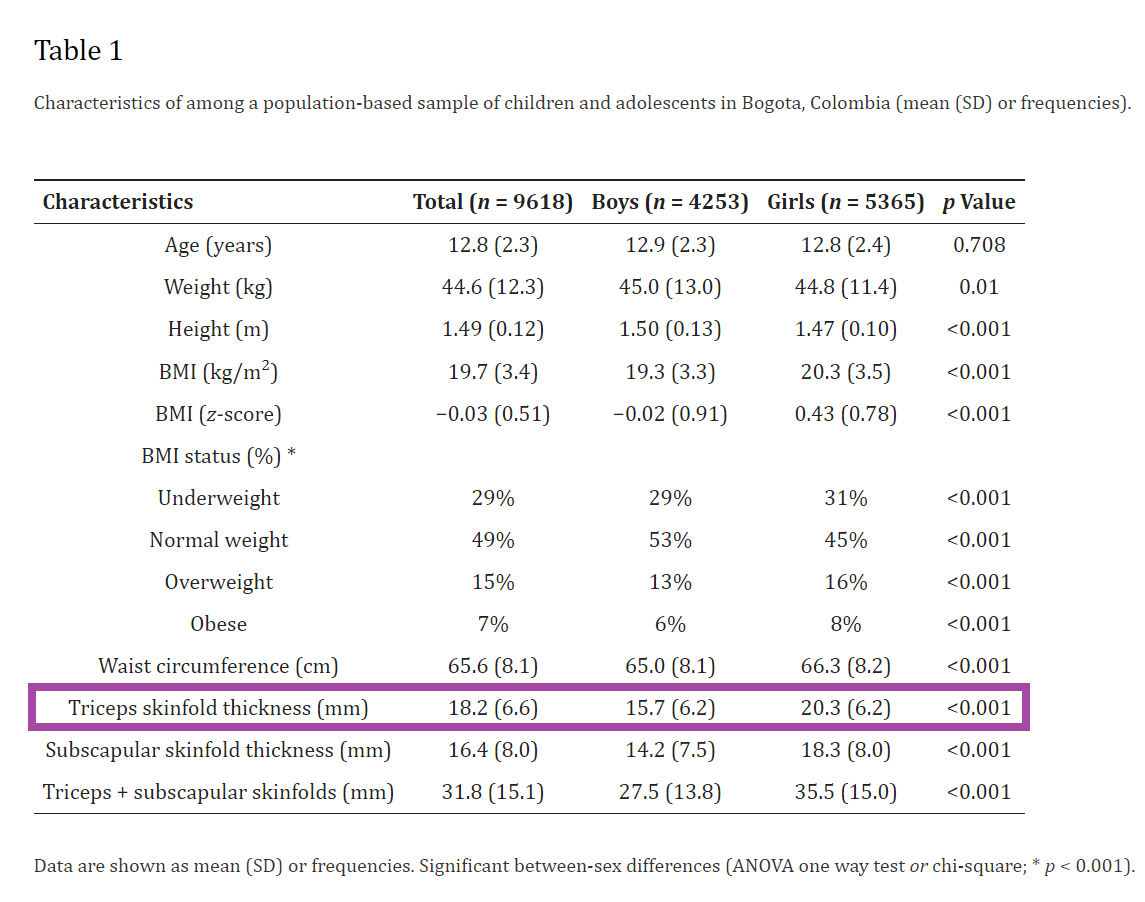

In [19]:
diabetes.SkinThickness.mean()

20.536458333333332

For the others, we will take median for glucose and mean for Bloodpressure and BMI for a better normal distribution.

We can first drop some rows where at least 4 columns values have zeroes

In [20]:
#Seeing the best combination with the maximum number of zeroes 
diabetes[(diabetes['BloodPressure']==0)&(diabetes['SkinThickness']==0)&(diabetes['BMI']==0)&(diabetes['Insulin']==0)]

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
49,7,105,0,0,0,0.0,0.305,24,0
60,2,84,0,0,0,0.0,0.304,21,0
81,2,74,0,0,0,0.0,0.102,22,0
426,0,94,0,0,0,0.0,0.256,25,0
494,3,80,0,0,0,0.0,0.174,22,0
522,6,114,0,0,0,0.0,0.189,26,0
706,10,115,0,0,0,0.0,0.261,30,1


In [21]:
#Dropping the subset 
diabetes = diabetes.drop(diabetes[(diabetes['BloodPressure']==0)&(diabetes['SkinThickness']==0)&(diabetes['BMI']==0)&(diabetes['Insulin']==0)].index,axis =0)

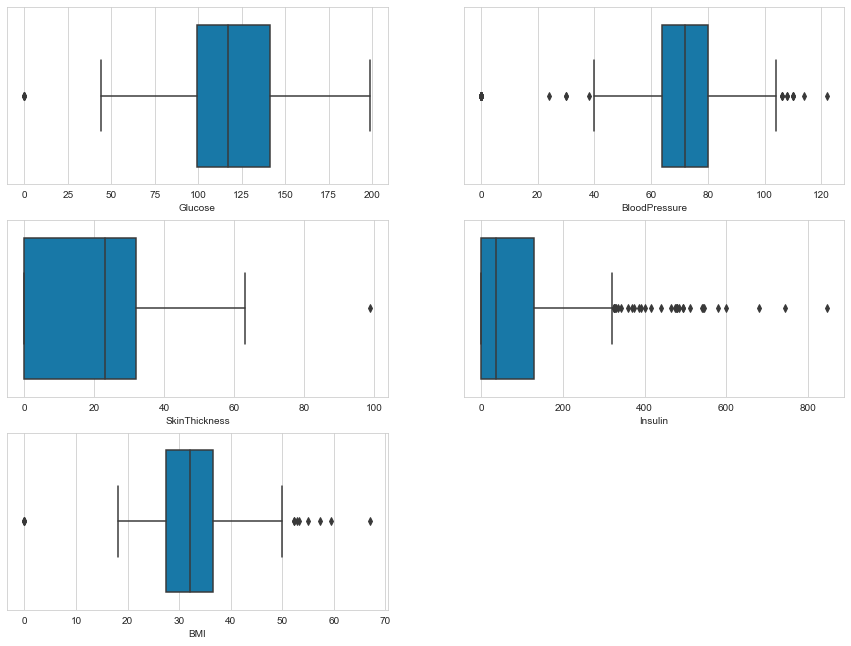

In [22]:
plt.figure(figsize = (15,15),)
sns.set_style('whitegrid')
for i in range(1,6):
    plt.subplot(4,2,i)
    sns.boxplot(data = diabetes,x = diabetes.iloc[:,i],palette='winter')
plt.show()

<AxesSubplot:>

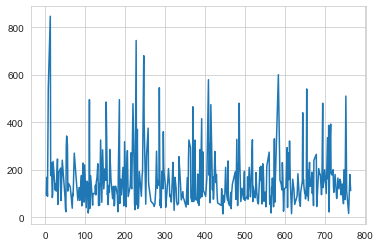

In [23]:
diabetes.drop(diabetes[diabetes['Insulin']==0].index,axis =0)['Insulin'].plot()

We can also observe that the insulin data seems to be highly skewed.But first, we will impute values according to the measures of central tendency on the 0 values.

In [24]:
diabetes.Glucose.median()

117.0

In [25]:
diabetes['Glucose'] = diabetes['Glucose'].apply(lambda x:diabetes.Glucose.median() if x==0 else x)
diabetes['BloodPressure'] = diabetes['BloodPressure'].apply(lambda x:diabetes.BloodPressure.mean() if x==0 else x)
diabetes['SkinThickness'] = diabetes['SkinThickness'].apply(lambda x:diabetes.SkinThickness.mean() if x==0 else x)
diabetes['Insulin'] = diabetes['Insulin'].apply(lambda x:diabetes.Insulin.median() if x==0 else x)
diabetes['BMI'] = diabetes['BMI'].apply(lambda x:diabetes.BMI.mean() if x==0 else x)

In [26]:
diabetes.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,761.000000,761.000000,761.000000,761.000000,761.000000,761.000000,761.000000,761.000000,761.000000
mean,3.840999,121.900131,72.307164,26.716924,97.894875,32.456567,0.474126,33.323259,0.350854
std,3.370491,30.435489,12.162284,9.623413,104.251187,6.906752,0.331947,11.779469,0.477551
min,0.000000,44.000000,24.000000,7.000000,14.000000,18.200000,0.078000,21.000000,0.000000
25%,1.000000,100.000000,64.000000,20.725361,36.000000,27.500000,0.244000,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,36.000000,32.286859,0.378000,29.000000,0.000000
75%,6.000000,141.000000,80.000000,32.000000,129.000000,36.600000,0.629000,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


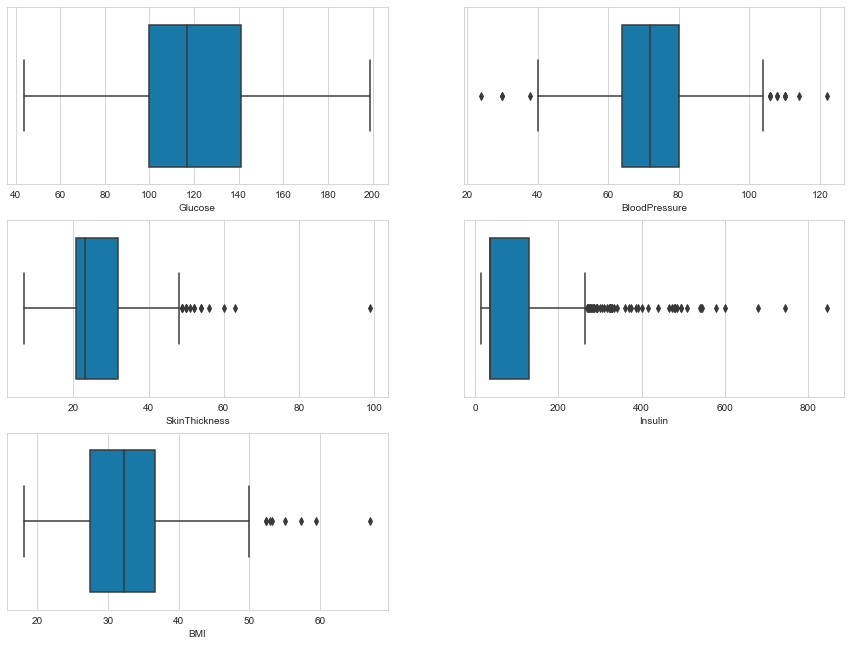

In [27]:
plt.figure(figsize = (15,15),)
sns.set_style('whitegrid')
for i in range(1,6):
    plt.subplot(4,2,i)
    sns.boxplot(data = diabetes,x = diabetes.iloc[:,i],palette='winter')
plt.show()

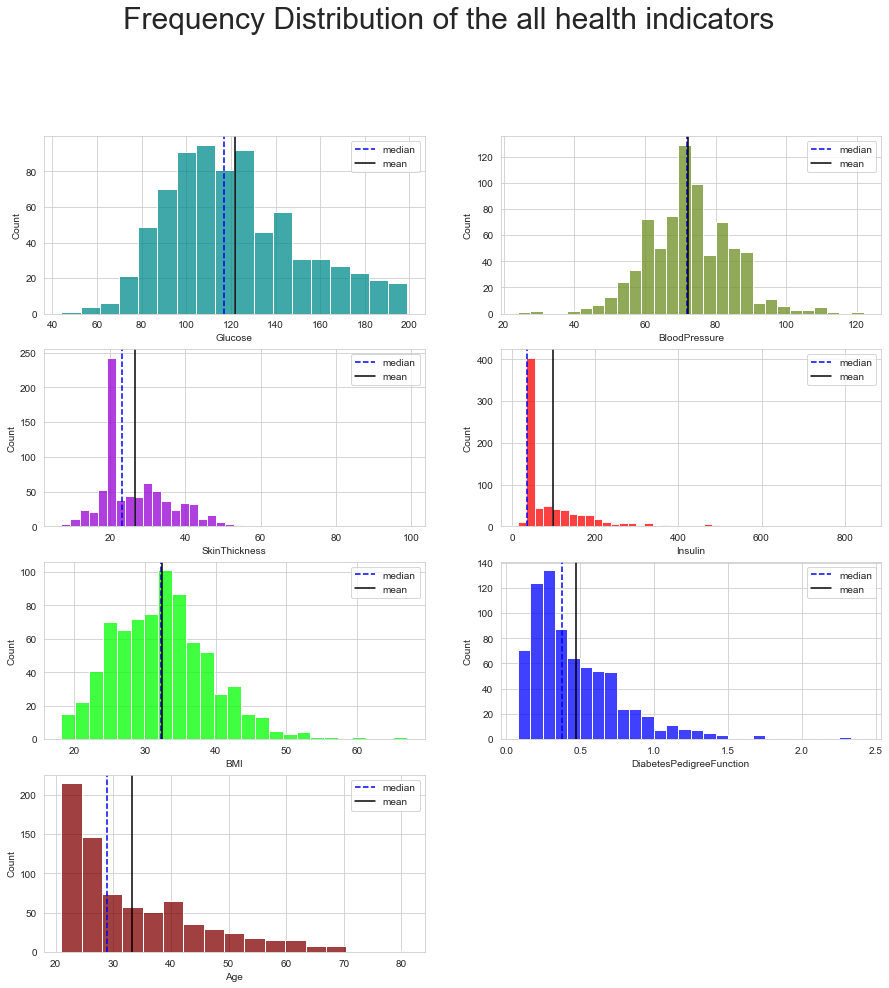

In [28]:
plt.figure(figsize = (15,15),)
sns.set_style('whitegrid')
color = ['darkcyan','olivedrab','darkviolet','red','lime','blue','maroon']
for i in range(1,8):
    plt.subplot(4,2,i)
    sns.histplot(diabetes,x = diabetes.iloc[:,i],color = color[i-1])
    plt.axvline(x=diabetes.iloc[:,i].median(),color='blue',ls='--', lw=1.5, label = 'median')
    plt.axvline(x=diabetes.iloc[:,i].mean(),color='black', lw=1.5,label = 'mean')
    plt.legend()
plt.suptitle('Frequency Distribution of the all health indicators', fontsize=30,verticalalignment = 'baseline',fontweight = 'book')
plt.show()

According to the source, insulin can be measured in either mcU/ml or mIU/ml (microunits per milliliter). The normal insulin levels in the blood of a healthy individual can vary with and without food.

- The fasting value is <25 mIU/L
- After 30 minutes of eating foods, the value is 30 to 230 mIU/L
- After 1 hour of eating foods, the value is 18 to 276 mIU/L
- After 2 hours of eating foods, the value is 16 to 166 mIU/L
- If ever the insulin levels are beyond the values mentioned, then it can be considered as hyperinsulinemia.

Let us check what rows which have insulin levels higher than 400

In [29]:
diabetes.sort_values(by = 'Insulin').head(20)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
445,0,180.0,78.00000,63.000000,14.0,59.4,2.420,25,1
617,2,68.0,62.00000,13.000000,15.0,20.1,0.257,23,0
760,2,88.0,58.00000,26.000000,16.0,28.4,0.766,22,0
566,1,99.0,72.00000,30.000000,18.0,38.6,0.412,21,0
108,3,83.0,58.00000,31.000000,18.0,34.3,0.336,25,0
711,5,126.0,78.00000,27.000000,22.0,29.6,0.439,40,0
52,5,88.0,66.00000,21.000000,23.0,24.4,0.342,30,0
182,1,117.0,74.00000,20.000000,23.0,27.7,0.299,21,0
597,1,89.0,24.00000,19.000000,25.0,27.8,0.559,21,0
323,13,152.0,90.00000,33.000000,29.0,26.8,0.731,43,1


Lets do some further correlation analysis to understand the situation better.

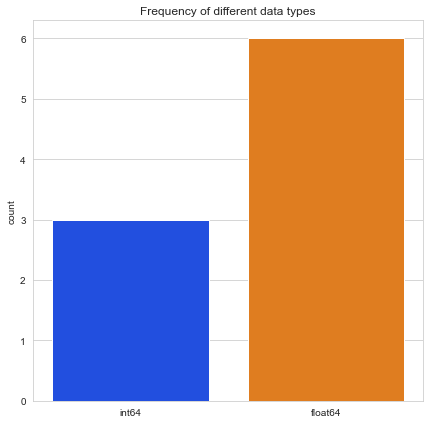

In [30]:
plt.figure(figsize = (7,7),)
sns.countplot(x = diabetes.dtypes.map(str),palette = "bright")
plt.title('Frequency of different data types')
plt.show()

Number of floating data type variables is higher than the integer variables. This shows that the data has high amount of precision values to lead to accurate results. Note that there is no object type over here. Now lets see how balanced the target variable **`Outcome`** is.

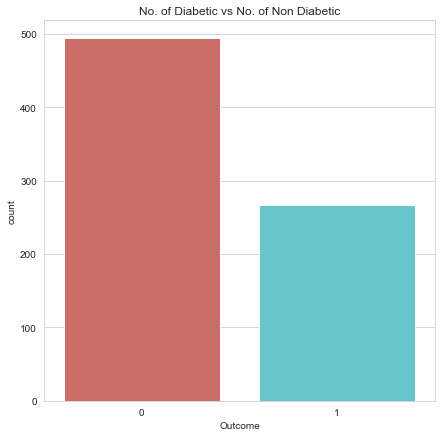

In [31]:
plt.figure(figsize = (7,7),)
sns.countplot(x = diabetes.Outcome,palette = sns.color_palette("hls", 2))
plt.title('No. of Diabetic vs No. of Non Diabetic')
plt.show()

As we can see, there is a huge imbalance between the two classes of no. of diabetic vs non-diabetic people.Theoretically this is good!!But this causes a lot of problems when we go for model building as the data is highly biased. To rectify this, we can use techniques and algorithms such as **Synthetic minority oversampling technique (SMOTE)** to balance the data. It aims to balance class distribution by randomly increasing minority class examples by replicating them.
SMOTE synthesises new minority instances between existing minority instances. It generates the virtual training records by linear interpolation for the minority class. These synthetic training records are generated by randomly selecting one or more of the k-nearest neighbors for each example in the minority class. After the oversampling process, the data is reconstructed and several models can be applied for the processed data.

First we need to do feature extraction on the entire dataset by identifying the features and target variable. **`Outcome`** is determined as the target while the rest are features.

In [32]:
#Setting up x and y
X = diabetes.drop(labels = 'Outcome', axis = 1)
y = diabetes['Outcome']

In [33]:
X.shape , y.shape

((761, 8), (761,))

In [34]:
#Class counter
Counter(y)

Counter({1: 267, 0: 494})

Applying SMOTE balancing on the entire dataset

In [35]:
smote = SMOTE()

In [36]:
X_bal , y_bal = smote.fit_resample(X,y)

In [37]:
#class counter after applying smote
Counter(y_bal)

Counter({1: 494, 0: 494})

Now the classes in the data is balanced. We will use this reorganized dataset later on while doing model testing comparision. Lets understand the relationships between all the variables.

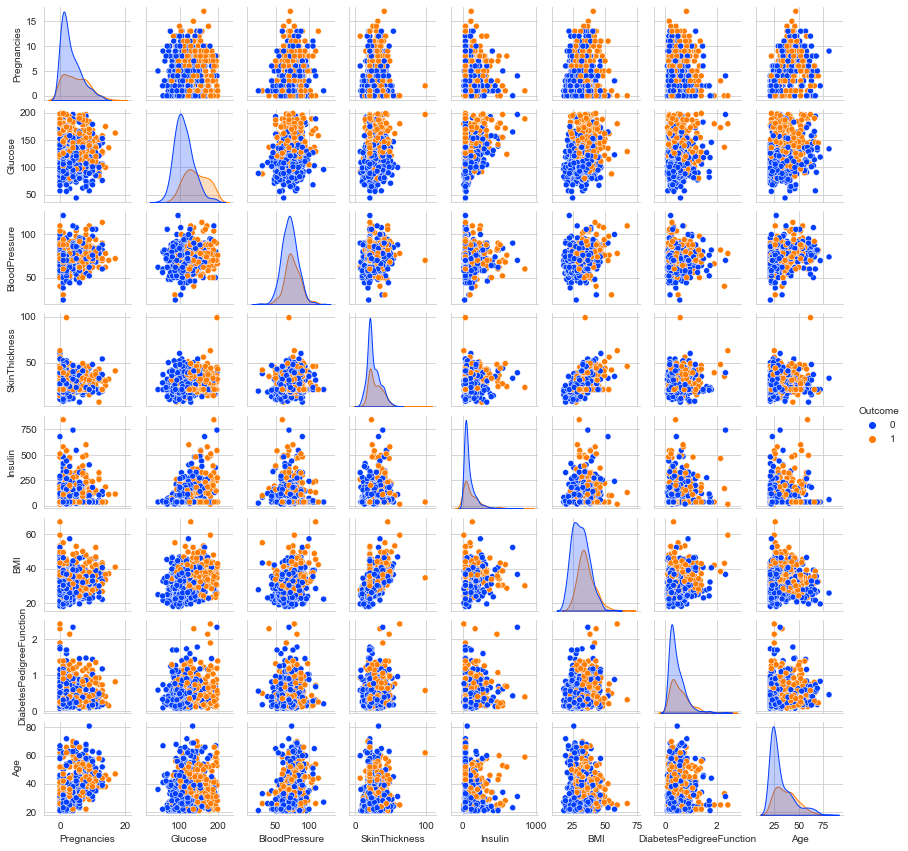

In [38]:
sns.pairplot(data = diabetes,height = 1.5,hue = 'Outcome', palette="bright")

We have a created relationship charts between each variable. From the above figure, we can make some very noticeable observations.
- The trend shows that patients which have high amount of glucose in their bloodstream, tend to be predominatly diabetic
- Most of patients predominatly have skinthickness of less than 50 and insulin less than 500.
- Established a linear relationship between BMI and Insulin. This makes sense as high BMI leads to obesity. 
- Patients with high BMI are moderately diabetic.Research studies have proven that there is a direct association of high BMI with type 2 diabetes. Type 2 diabetes is a serious disease and is often referred to as silent killer and is an associated health risk of high BMI. In this disease, the blood glucose level in the body is too high and the insulin hormone fails to utilize this glucose level to carry it to the cells and turn it into energy. To help the utilization of the blood glucose level, the body initially increases the secretion of insulin hormone. However, it still fails to work on the glucose or control the glucose level. Gradually the production or secretion of insulin hormone is also reduced. Consequently, a number of other disorders take place.
- We can safely state that patients with higher amount of glucose and lower amount of insulin, are diabetic. 
- Diabetes Pedigree function i.e. the chances of getting diabetes from your ancestory, is high and most likely to be diabetic if some attributes like pregnancies & BMI are high.
<p>Lets do a correlation analysis to understand the relationships more clearly. 

<AxesSubplot:>

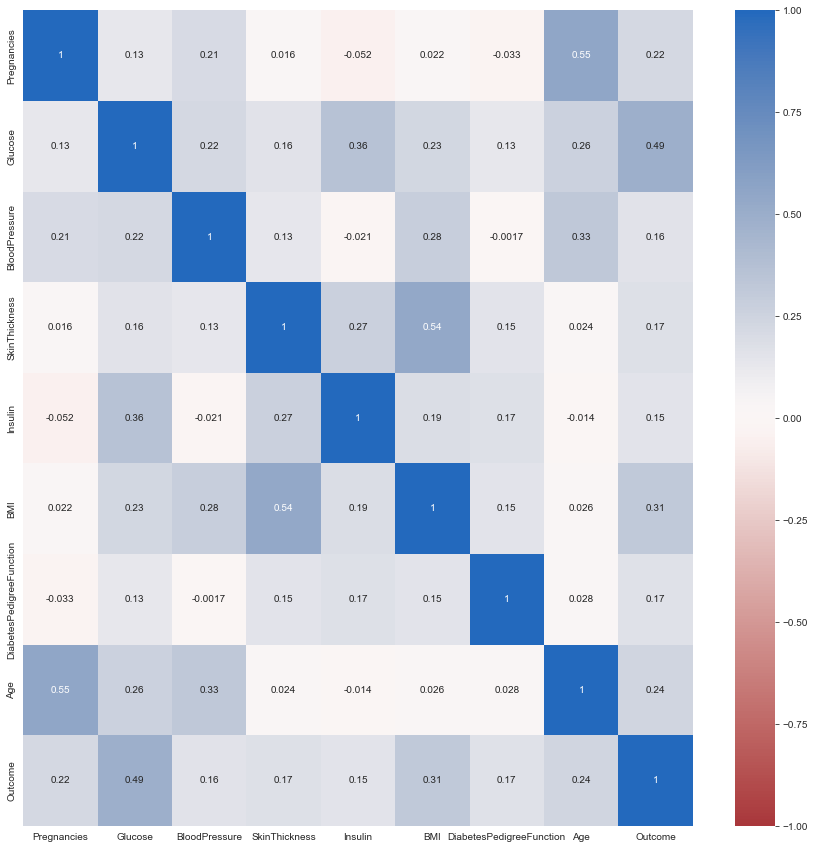

In [39]:
corr = diabetes.corr()
color = sns.cm.vlag_r
plt.figure(figsize=(15,15))
sns.heatmap(data = corr,cmap = color,vmin=-1,vmax = +1,annot = True)

According to the figure,we can observe that:
- The correlations are mostly positively correlated with adult patients with higher ages have more number of pregnancies.
- Moderately high correlation between BMI and skin thickness proves that high body mass leads to obesity.
- Finally out of all the attributes, **`Glucose`** seems to be the main driver behind diabetes proves why diabetic patients always check their blood sugar first.

## <u>Data Preparation</u>⚗️
Now we have acquired enough understanding behind the data, now we move on to the prediction of diabetes. But before we start with the modelling, we need to prepare the data to ensure its in the right format to be used in training. Now we have already extracted the features and target previously while balancing and all the data is in numerical format. We can finally split the dataset into train and test sets.

In [40]:
X_train , X_test, y_train, y_test = train_test_split(X,y,train_size=0.70,random_state=241)
X_train.shape,y_train.shape,X_test.shape,y_test.shape

((532, 8), (532,), (229, 8), (229,))

In [41]:
X_bal_train , X_bal_test, y_bal_train, y_bal_test = train_test_split(X_bal,y_bal,train_size=0.70,random_state=241)
X_bal_train.shape,y_bal_train.shape,X_bal_test.shape,y_bal_test.shape

((691, 8), (691,), (297, 8), (297,))

In [42]:
scaler1 = StandardScaler().fit(X_train)
X_std_train = scaler1.transform(X_train)
X_std_test = scaler1.transform(X_test)
scaler2 = StandardScaler().fit(X_bal_train)
X_bal_std_train = scaler2.transform(X_bal_train)
X_bal_std_test = scaler2.transform(X_bal_test)

## <u>Data Modelling</u>🎛️
Now is the time to create a model to predict if the patient is diabetic based on the notable attributes. We need to devise a strategy to implement the right machine learning models along with the cross validation technique to ensure it is trained accurately. Lets first start off with implementing a simple logistic regression model to find a basic model. 

In [43]:
#Initializing logistic regression
lr = LogisticRegression(solver = 'liblinear')
lr

LogisticRegression(solver='liblinear')

In [44]:
#Model training with logistic regression algorithm
lr = lr.fit(X_train,y_train)

In [45]:
lr.n_iter_ #No. of iterations to reach convergence

array([17], dtype=int32)

In [46]:
lr.classes_ #classes present in target variable

array([0, 1], dtype=int64)

In [47]:
lr.coef_ #Coefficients of all the features present for training

array([[ 7.12285801e-02,  2.67300809e-02, -2.60101863e-02,
         4.46776783e-03, -3.00901428e-04,  7.41483773e-02,
         4.23123276e-01,  1.53558028e-02]])

In [48]:
lr.intercept_ #Intercept value with y axis

array([-5.51209462])

In [49]:
pred = lr.predict(X_test)
pred

array([0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0,
       1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1,
       0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0,
       0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0,
       1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0,
       0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 1], dtype=int64)

In [50]:
prob_pred = lr.predict_proba(X_test) #Probability estimates of each record
prob_pred

array([[0.69894213, 0.30105787],
       [0.70699199, 0.29300801],
       [0.96082979, 0.03917021],
       [0.88161803, 0.11838197],
       [0.2215552 , 0.7784448 ],
       [0.27797964, 0.72202036],
       [0.42997884, 0.57002116],
       [0.25749722, 0.74250278],
       [0.54372818, 0.45627182],
       [0.8811548 , 0.1188452 ],
       [0.71582559, 0.28417441],
       [0.6103824 , 0.3896176 ],
       [0.94177386, 0.05822614],
       [0.28657182, 0.71342818],
       [0.72196525, 0.27803475],
       [0.80100407, 0.19899593],
       [0.75343837, 0.24656163],
       [0.35592952, 0.64407048],
       [0.41918361, 0.58081639],
       [0.74435566, 0.25564434],
       [0.90815921, 0.09184079],
       [0.88157156, 0.11842844],
       [0.70252877, 0.29747123],
       [0.70006308, 0.29993692],
       [0.83047072, 0.16952928],
       [0.76621718, 0.23378282],
       [0.83936562, 0.16063438],
       [0.83846887, 0.16153113],
       [0.65218768, 0.34781232],
       [0.76682888, 0.23317112],
       [0.

We have finally trained the logistic regression model. The probability estimates shows the chances of either a diabetic or non diabetic outcome for each record. We can create a custom threshold limit to acccordingly change the cutoff of being classified as diabetic or non diabetic on a sigmoid curve.Let us generate a classification report to analyse the precion, recall and f1 score. 

In [51]:
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

           0       0.80      0.85      0.82       152
           1       0.66      0.57      0.61        77

    accuracy                           0.76       229
   macro avg       0.73      0.71      0.72       229
weighted avg       0.75      0.76      0.75       229



<AxesSubplot:>

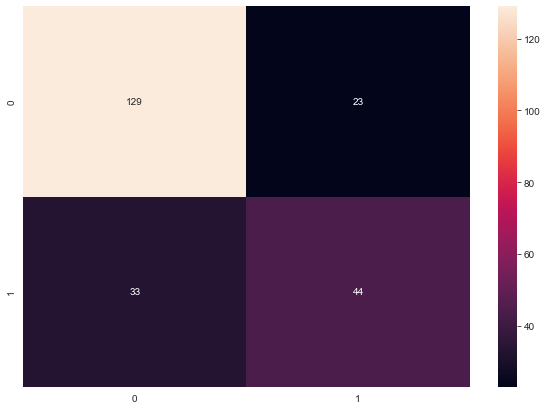

In [52]:
mat = confusion_matrix(y_test,pred)
plt.figure(figsize = (10,7))
sns.heatmap(mat,annot=True,fmt='g')

The reason for poor f1 scores of the positive class is due to an unbalanced dataset.Lets use the previously balanced dataset for training and see the results we obtain.

#### <u>Logistic Regression on balanced dataset</u>

In [53]:
log2 = LogisticRegression(solver = 'liblinear')
log2 = log2.fit(X_bal_train,y_bal_train)
pred_log = log2.predict(X_bal_test)
print(pred_log)
print(classification_report(y_bal_test,pred_log))

[1 0 0 0 1 0 1 1 1 0 1 0 1 1 0 1 1 1 1 0 1 1 0 0 0 1 0 1 0 1 0 0 1 0 1 0 0
 1 0 1 1 0 0 0 1 1 1 0 1 1 1 0 1 1 1 0 1 1 1 0 0 0 0 0 1 1 1 0 1 1 1 0 0 0
 1 0 0 0 0 1 0 0 1 0 0 0 0 1 1 1 1 1 1 0 0 0 0 0 0 1 1 0 1 0 0 1 0 0 1 0 1
 0 0 1 1 0 0 1 0 0 1 1 0 1 1 0 0 0 0 1 1 0 0 1 0 1 0 1 1 1 1 1 0 0 1 0 1 1
 1 1 1 0 0 1 1 0 1 0 0 0 1 1 0 1 1 1 1 0 0 1 1 0 0 0 1 0 1 0 0 1 1 1 0 1 1
 0 1 0 0 0 1 1 0 0 1 1 0 0 0 0 1 0 0 0 1 0 1 1 0 0 1 1 0 1 1 0 1 1 1 0 0 1
 0 0 0 1 1 1 1 1 1 1 1 1 0 0 0 1 1 1 0 1 1 0 1 1 1 1 0 0 1 1 0 1 1 0 0 0 1
 0 1 0 0 0 0 0 1 1 1 0 1 0 1 0 0 0 1 0 1 1 1 1 1 1 1 1 0 0 1 0 1 0 0 1 0 0
 0]
              precision    recall  f1-score   support

           0       0.83      0.74      0.78       160
           1       0.73      0.82      0.77       137

    accuracy                           0.78       297
   macro avg       0.78      0.78      0.78       297
weighted avg       0.78      0.78      0.78       297



<AxesSubplot:>

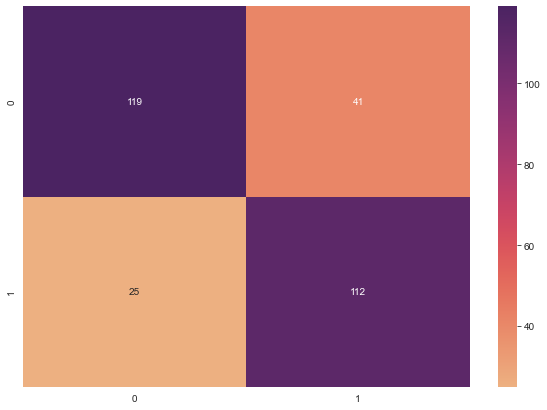

In [54]:
mat = confusion_matrix(y_bal_test,pred_log)
plt.figure(figsize = (10,7))
sns.heatmap(mat,annot=True,fmt='g',cmap=sns.color_palette("flare", as_cmap=True))

Much better! Similarly, let's do an extensive comparison between all classifiers especially with the k-Nearest Neighbours algorithm and see which model really works accurately on the basis of its ***accuracy*** score.Note that in order for the model to not be biased to one class in target variable, we will perform model building on the balanced dataset from now on.

#### <u>Decision Tree algorithm</u>

In [55]:
dt = DecisionTreeClassifier()
dt = dt.fit(X_bal_train,y_bal_train)
dt_pred = dt.predict(X_bal_test)
print(dt_pred)
print(classification_report(y_bal_test,dt_pred))

[1 0 0 0 1 0 1 1 1 0 1 0 1 0 1 1 1 1 1 0 1 1 0 0 0 1 0 1 1 0 0 0 1 0 1 1 0
 1 1 0 1 0 1 0 0 1 1 0 1 1 1 0 0 1 0 0 1 1 1 0 0 0 0 0 0 1 1 1 0 1 1 0 0 0
 1 1 1 0 0 1 1 0 1 0 1 1 1 1 1 1 1 0 1 1 1 1 0 0 0 0 1 0 1 0 1 1 0 1 1 0 1
 0 0 1 1 0 0 0 1 0 0 0 0 1 1 0 1 0 0 1 1 1 0 1 0 0 0 0 1 1 1 1 0 1 1 1 1 1
 1 1 1 0 0 0 1 0 0 0 0 1 0 1 0 1 1 1 1 0 0 1 1 1 1 1 1 1 1 0 0 1 1 1 0 1 1
 0 1 0 1 0 1 0 1 0 1 1 1 0 1 0 0 1 0 0 1 0 1 1 0 0 1 1 1 0 1 1 0 1 1 1 0 1
 0 0 1 0 1 0 1 1 1 1 1 1 0 0 0 1 0 0 1 1 0 1 1 1 0 1 0 0 1 1 0 1 1 0 0 0 1
 0 1 0 1 0 1 0 1 0 1 0 1 0 1 1 1 1 0 0 0 1 0 0 0 1 1 1 1 1 1 0 1 1 1 0 0 0
 0]
              precision    recall  f1-score   support

           0       0.80      0.66      0.73       160
           1       0.67      0.81      0.74       137

    accuracy                           0.73       297
   macro avg       0.74      0.74      0.73       297
weighted avg       0.74      0.73      0.73       297



<AxesSubplot:>

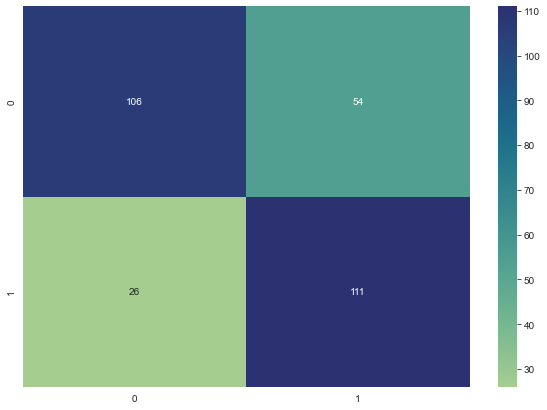

In [56]:
mat = confusion_matrix(y_bal_test,dt_pred)
plt.figure(figsize = (10,7))
sns.heatmap(mat,annot=True,fmt='g',cmap = sns.color_palette("crest", as_cmap=True))

#### <u>Linear Discriminant Analysis algorithm</u>

In [57]:
lda = LinearDiscriminantAnalysis()
lda = lda.fit(X_bal_train,y_bal_train)
lda_pred = lda.predict(X_bal_test)
print(lda_pred)
print(classification_report(y_bal_test,lda_pred))

[1 0 0 0 1 0 1 1 0 0 1 0 1 1 0 1 1 1 1 0 1 1 0 0 0 1 0 1 0 1 0 0 1 0 1 0 0
 1 0 1 0 0 0 0 0 1 1 0 1 1 1 0 0 1 1 0 1 0 1 0 0 0 0 0 1 1 1 0 1 1 1 0 0 0
 1 0 0 0 0 1 0 0 1 0 0 0 0 1 1 1 1 1 1 0 0 0 0 0 0 1 1 0 1 0 0 1 0 0 1 0 1
 0 0 1 1 0 1 0 0 0 1 0 0 1 1 0 0 0 0 1 1 0 0 1 1 1 0 1 1 1 0 0 0 0 0 0 1 1
 1 1 1 0 0 1 1 0 1 0 0 0 1 1 0 1 0 1 1 0 0 1 1 0 0 0 1 0 1 0 0 1 1 1 0 1 0
 0 1 0 0 0 1 1 0 0 1 1 0 0 0 0 1 0 0 0 1 0 0 1 0 0 1 1 1 1 1 0 1 1 1 0 0 1
 0 0 0 1 1 1 1 1 1 1 1 1 0 0 0 1 1 1 0 1 1 0 1 0 1 1 0 0 1 0 0 0 1 0 0 0 1
 0 1 0 0 0 0 0 1 1 1 0 1 0 1 0 1 0 1 0 1 1 1 1 1 0 1 1 0 0 1 0 1 0 0 0 0 0
 0]
              precision    recall  f1-score   support

           0       0.77      0.76      0.77       160
           1       0.73      0.74      0.73       137

    accuracy                           0.75       297
   macro avg       0.75      0.75      0.75       297
weighted avg       0.75      0.75      0.75       297



<AxesSubplot:>

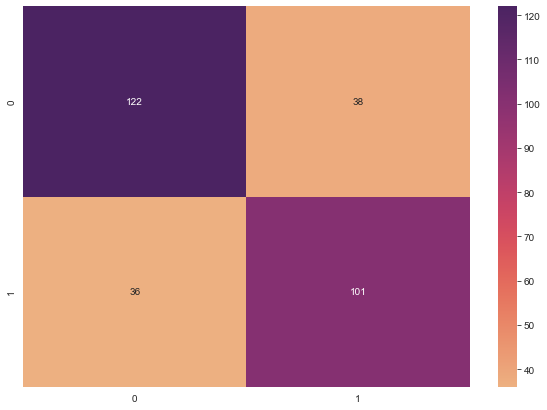

In [58]:
mat = confusion_matrix(y_bal_test,lda_pred)
plt.figure(figsize = (10,7))
sns.heatmap(mat,annot=True,fmt='g',cmap=sns.color_palette("flare", as_cmap=True))

#### <u>Naive-Bayes algorithm</u>

In [59]:
nb = GaussianNB()
nb = nb.fit(X_bal_train,y_bal_train)
nb_pred = nb.predict(X_bal_test)
print(nb_pred)
print(classification_report(y_bal_test,nb_pred))

[1 0 0 0 1 1 1 1 0 0 1 0 1 1 0 0 1 1 1 0 1 1 0 1 0 1 0 1 0 1 0 1 1 0 1 0 0
 0 1 1 0 0 0 0 0 1 1 0 1 1 0 0 0 1 0 0 1 0 1 0 0 0 0 0 1 1 1 0 1 1 1 0 0 1
 1 0 0 0 0 1 0 0 1 0 0 0 0 1 1 1 1 0 1 0 1 0 0 0 0 1 0 1 1 0 0 0 1 0 0 0 1
 0 0 1 1 0 1 0 0 1 1 0 0 1 1 0 1 0 0 0 1 0 0 1 0 1 0 1 0 1 0 0 0 0 0 0 1 1
 1 0 1 0 0 0 1 0 0 0 0 0 1 1 0 1 0 1 1 0 0 0 1 0 0 0 1 0 1 0 0 1 1 1 0 1 0
 0 1 0 1 0 0 1 0 0 0 1 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 1 1 0 1 0 1 1 1 0 1 1
 0 0 0 1 1 1 1 1 1 1 1 1 0 0 0 1 1 1 0 1 1 0 1 0 1 0 0 0 1 0 0 0 1 0 0 0 1
 0 1 0 0 0 0 0 1 1 1 0 1 0 1 0 1 0 1 0 1 1 1 1 1 0 1 1 0 0 0 0 0 0 0 0 0 0
 0]
              precision    recall  f1-score   support

           0       0.71      0.76      0.73       160
           1       0.69      0.64      0.67       137

    accuracy                           0.70       297
   macro avg       0.70      0.70      0.70       297
weighted avg       0.70      0.70      0.70       297



<AxesSubplot:>

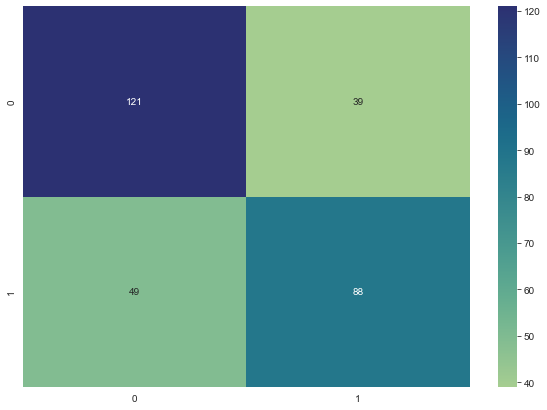

In [60]:
mat = confusion_matrix(y_bal_test,nb_pred)
plt.figure(figsize = (10,7))
sns.heatmap(mat,annot=True,fmt='g',cmap = sns.color_palette("crest", as_cmap=True))

For the **SVM** algorithm, it is imperative that we standardise the dataset to ensure all variables are in the same range. This is because it tries to maximize the distance between the separating plane and the support vectors. If one feature has very large values, it will dominate over other features when calculating the distance. So Standardization gives all features the same influence on the distance metric.

#### <u>Support Vector Machines algorithm</u>

In [61]:
svm = SVC()
svm = svm.fit(X_bal_std_train,y_bal_train)
svm_pred = svm.predict(X_bal_std_test)
print(svm_pred)
print(classification_report(y_bal_test,svm_pred))

[1 0 0 0 1 0 1 1 1 0 1 0 1 0 1 1 1 1 1 0 1 1 0 0 0 1 0 1 1 1 0 0 1 0 1 1 0
 0 0 0 0 0 0 0 0 1 1 0 1 1 1 0 1 1 1 0 1 1 1 0 0 0 0 0 1 1 1 1 1 1 0 0 0 0
 1 1 0 0 0 1 0 0 1 0 0 0 0 1 1 1 1 1 1 0 1 0 0 0 0 1 1 1 1 0 0 1 0 0 1 0 1
 0 0 1 1 0 1 1 1 1 0 1 0 1 1 0 1 0 0 1 1 0 0 1 0 1 0 1 1 1 1 0 0 1 0 0 1 1
 1 1 1 0 0 1 1 0 0 0 0 0 1 1 1 1 1 1 1 0 0 1 1 0 1 0 1 0 1 0 0 1 1 1 0 1 1
 0 1 0 1 0 1 1 1 0 1 1 1 1 0 0 0 1 0 0 1 0 1 1 0 0 1 1 1 1 1 1 1 1 1 1 1 1
 0 1 0 1 1 1 1 1 1 1 1 1 0 0 0 1 1 1 0 1 1 1 1 1 1 1 0 0 1 1 0 0 1 0 0 0 1
 0 1 0 0 1 0 0 1 1 0 0 1 0 1 0 0 1 1 1 0 1 1 1 1 1 1 1 1 1 1 0 1 0 0 1 0 0
 1]
              precision    recall  f1-score   support

           0       0.91      0.72      0.80       160
           1       0.74      0.91      0.81       137

    accuracy                           0.81       297
   macro avg       0.82      0.82      0.81       297
weighted avg       0.83      0.81      0.81       297



<AxesSubplot:>

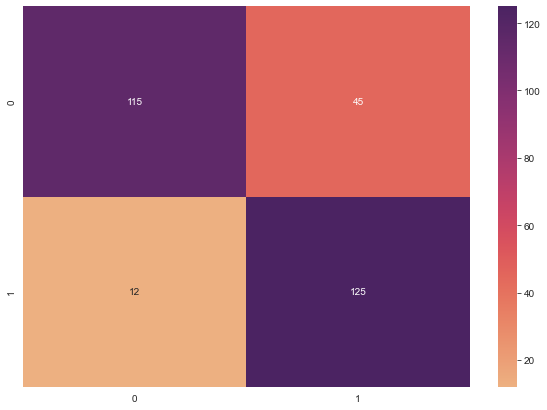

In [62]:
mat = confusion_matrix(y_bal_test,svm_pred)
plt.figure(figsize = (10,7))
sns.heatmap(mat,annot=True,fmt='g',cmap=sns.color_palette("flare", as_cmap=True))

Now that we have extracted the performance metrics from a variety of models, let us finally create a KNN algo and compare our results with this algorithm. Similar to SVM model, we have to ensure the dataset is standardised for the same reason as k-nearest neighbors is a distance based classifier that classifies new observations based on similarity measures (e.g., distance metrics) with labeled observations of the training set.

#### <u>K-Nearest Neighbour algorithm</u>

In [63]:
knn = KNeighborsClassifier(metric = 'euclidean')
knn = knn.fit(X_bal_std_train,y_bal_train)
knn_pred = knn.predict(X_bal_std_test)
print(knn_pred)
print(classification_report(y_bal_test,knn_pred))

[1 0 0 0 1 0 1 1 1 1 1 0 1 1 1 0 1 1 1 0 1 1 0 0 0 1 0 1 1 1 0 1 1 0 1 0 0
 1 0 1 0 0 1 0 0 1 1 0 1 0 1 0 1 1 1 0 1 1 1 0 0 0 0 0 0 1 0 1 1 1 0 0 0 0
 1 1 0 0 0 1 0 1 1 0 1 1 0 0 1 1 1 0 1 0 1 1 0 0 1 1 1 1 1 0 0 1 0 1 1 0 1
 0 0 1 1 0 1 0 1 1 0 1 0 1 1 0 1 0 0 0 1 0 0 1 0 1 0 0 1 1 1 0 1 0 0 0 1 1
 1 1 1 0 0 0 1 1 0 1 0 0 1 1 0 1 1 1 1 0 0 1 1 0 1 1 1 0 1 0 0 1 1 1 0 1 1
 0 1 0 0 0 1 1 1 0 0 1 0 0 0 0 0 1 0 0 1 0 1 1 0 0 1 1 1 1 1 1 1 1 1 1 1 1
 1 0 0 1 1 1 1 1 1 1 1 1 0 0 0 1 1 0 0 0 1 1 1 1 1 0 0 0 1 1 0 0 1 0 0 0 1
 0 1 0 0 1 1 0 1 1 1 0 1 0 1 0 0 1 1 1 1 1 1 1 1 1 1 1 0 1 1 0 1 0 0 1 0 1
 1]
              precision    recall  f1-score   support

           0       0.84      0.67      0.74       160
           1       0.69      0.85      0.76       137

    accuracy                           0.75       297
   macro avg       0.76      0.76      0.75       297
weighted avg       0.77      0.75      0.75       297



<AxesSubplot:>

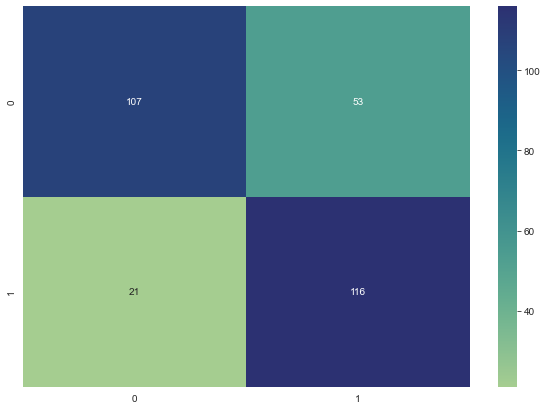

In [64]:
mat = confusion_matrix(y_bal_test,knn_pred)
plt.figure(figsize = (10,7))
sns.heatmap(mat,annot=True,fmt='g',cmap = sns.color_palette("crest", as_cmap=True))

It can be seen that out of all the algorithms present here, only support vector machines seems to do a little better than knn algorithm with an accuracy of 80% score. Logistic regression has the same score as that of knn with 77%.So we select these algorithms and try and see if we can do further improvement by using ensemble techniques. We would prefer to use Ada boost, gradient boost & random forest:
- **Ada Boosting** has many advantages due to its ease of use and less parameter tweaking when compared with the SVM algorithms. Plus AdaBoost can be used with SVM though theoretically, overfitting is not a feature of AdaBoost applications, perhaps because the parameters are not optimized jointly and the learning process is slowed due to estimation stage-wise. 
- **Gradient boosting** retuns more accurate results compared to other modes, train faster especially on larger datasets, can handle categorical as well as numerical variables and handle missing values natively.
- **Random Forest** is a bagging method which present estimates for variable importance, i.e., neural nets. They also offer a superior method for working with missing data. Missing values are substituted by the variable appearing the most in a particular node. Among all the available classification methods, random forests provide the highest accuracy. It can automatically balance data sets when a class is more infrequent than other classes in the data.

#### <u>Ada Boost algorithm</u>

In [65]:
ada = AdaBoostClassifier(base_estimator=LogisticRegression())
ada = ada.fit(X_bal_train,y_bal_train)
ada_pred =ada.predict(X_bal_test)
print(ada_pred)
print(classification_report(y_bal_test,ada_pred))

[1 0 0 0 1 0 1 1 1 0 1 0 1 1 0 1 1 1 1 0 1 1 0 0 0 1 0 1 0 1 0 0 1 0 1 0 0
 1 0 1 0 0 0 0 1 1 1 0 1 1 1 0 0 1 0 0 1 0 1 0 0 0 0 0 1 1 1 0 1 1 1 0 0 1
 1 0 0 0 0 0 0 0 1 0 0 0 0 1 1 1 1 1 1 0 0 0 0 0 0 1 0 0 1 0 0 1 0 0 1 0 1
 0 0 1 1 0 1 0 0 1 1 0 0 1 1 0 0 0 0 1 1 0 0 1 1 1 0 1 1 1 1 0 0 0 1 0 1 1
 1 1 1 0 0 1 1 0 1 0 0 0 1 1 0 1 0 1 1 0 0 1 1 0 0 0 1 0 1 0 0 1 1 1 0 1 0
 0 1 0 0 0 1 1 0 0 1 1 0 0 0 0 1 0 1 0 1 0 0 1 0 0 1 1 1 1 1 0 1 1 1 0 0 1
 0 0 0 1 1 1 1 1 1 1 1 1 0 0 0 1 1 1 0 1 1 0 1 0 1 1 0 0 1 0 0 0 1 0 0 0 1
 0 1 0 0 0 0 0 1 1 1 0 1 0 1 0 1 0 1 0 1 1 0 1 1 0 1 1 0 0 1 0 1 0 0 0 0 0
 0]
              precision    recall  f1-score   support

           0       0.75      0.73      0.74       160
           1       0.70      0.72      0.71       137

    accuracy                           0.73       297
   macro avg       0.73      0.73      0.73       297
weighted avg       0.73      0.73      0.73       297



<AxesSubplot:>

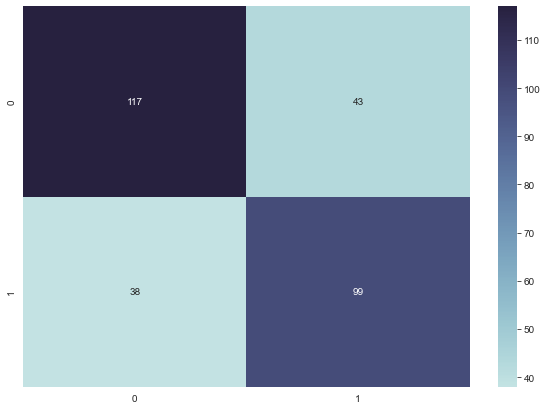

In [66]:
mat = confusion_matrix(y_bal_test,ada_pred)
plt.figure(figsize = (10,7))
sns.heatmap(mat,annot=True,fmt='g',cmap = sns.color_palette("ch:start=.2,rot=-.3", as_cmap=True))

#### <u>Gradient Boost algorithm</u>

In [67]:
grad = GradientBoostingClassifier()
grad = grad.fit(X_bal_train,y_bal_train)
grad_pred =grad.predict(X_bal_test)
print(classification_report(y_bal_test,grad_pred))

              precision    recall  f1-score   support

           0       0.86      0.69      0.76       160
           1       0.70      0.87      0.78       137

    accuracy                           0.77       297
   macro avg       0.78      0.78      0.77       297
weighted avg       0.79      0.77      0.77       297



<AxesSubplot:>

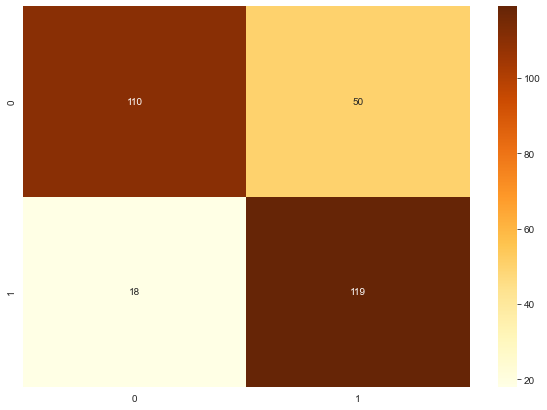

In [68]:
mat = confusion_matrix(y_bal_test,grad_pred)
plt.figure(figsize = (10,7))
sns.heatmap(mat,annot=True,fmt='g',cmap = sns.color_palette("YlOrBr", as_cmap=True))

#### <u>Random Forest algorithm</u>

In [69]:
rf = RandomForestClassifier()
rf = rf.fit(X_bal_train,y_bal_train)
rf_pred =rf.predict(X_bal_test)
print(classification_report(y_bal_test,rf_pred))

              precision    recall  f1-score   support

           0       0.90      0.74      0.82       160
           1       0.75      0.91      0.82       137

    accuracy                           0.82       297
   macro avg       0.83      0.82      0.82       297
weighted avg       0.83      0.82      0.82       297



<AxesSubplot:>

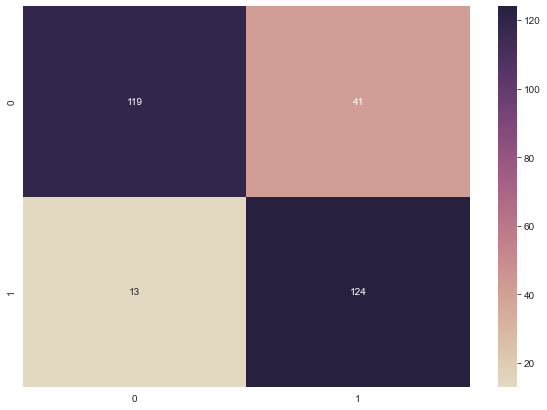

In [70]:
mat = confusion_matrix(y_bal_test,rf_pred)
plt.figure(figsize = (10,7))
sns.heatmap(mat,annot=True,fmt='g',cmap = sns.color_palette("ch:s=-.2,r=.6", as_cmap=True))

We can see that while ada boost has a relatively lesser score than knn algo itself, gradient boosting performs the same as that of SVM. We have finally built our models!! But we can't conclude much from here as this just for one single case. Moreover for algorithm like gradient boosting,we need to do cross validation to check if such models aren't overfitted. 

## <u>Testing</u>💉

In [71]:
#Spot checking algorithms
models = []
models.append(('LR', LogisticRegression()))
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('NB', GaussianNB()))
models.append(('SVM', SVC()))
models

[('LR', LogisticRegression()),
 ('LDA', LinearDiscriminantAnalysis()),
 ('KNN', KNeighborsClassifier()),
 ('CART', DecisionTreeClassifier()),
 ('NB', GaussianNB()),
 ('SVM', SVC())]

- We will implement k-fold cross validation technique as that it is a data partitioning strategy so that you can effectively use your dataset to build a more generalized model. One can build a perfect model on the training data with 100% accuracy or 0 error, but it may fail to generalize for unseen data. So, it is not a good model. It overfits the training data. Machine Learning is all about generalization meaning that model’s performance can only be measured with data points that have never been used during the training process. That is why we often split our data into a training set and a test set.
- We hence use k-fold cross validation because it ensures that every observation from the original dataset has the chance of appearing in training and test set. This is one among the best approach if we have a limited input data.

In [72]:
results = []
names = []
# n_splits = 5
for name, model in models:
    kfold = KFold(n_splits=5, shuffle=True, \
                                  random_state=5)
    cv_results = cross_val_score(model, X_bal_train, \
                                                 y_bal_train, cv=kfold, \
                                                 scoring='accuracy')
    results.append(cv_results)
    names.append(name)
    msg = "%s: %5.2f (%5.2f)" % (name, cv_results.mean()*100, \
                           cv_results.std()*100)
    print(msg)

LR: 73.38 ( 4.88)
LDA: 72.80 ( 3.59)
KNN: 73.95 ( 1.54)
CART: 71.06 ( 2.16)
NB: 72.80 ( 3.74)
SVM: 70.19 ( 2.69)


In [73]:
results_df = pd.DataFrame(results, index=names, \
                          columns='CV1 CV2 CV3 CV4 CV5'.split())
n_splits = 5
results_df['CV Mean'] = results_df.iloc[:,0:n_splits].mean(axis=1)
results_df['CV Std Dev'] = results_df.iloc[:,0:n_splits].std(axis=1)
pd.set_option('precision',1)
results_df.sort_values(by='CV Mean', ascending=False)*100

,CV1,CV2,CV3,CV4,CV5,CV Mean,CV Std Dev
KNN,74.8,73.9,74.6,71.0,75.4,73.9,1.7
LR,69.1,79.0,69.6,79.7,69.6,73.4,5.5
NB,68.3,76.1,70.3,78.3,71.0,72.8,4.2
LDA,69.8,74.6,71.0,79.0,69.6,72.8,4.0
CART,69.1,73.9,68.1,72.5,71.7,71.1,2.4
SVM,66.2,73.2,68.8,73.2,69.6,70.2,3.0


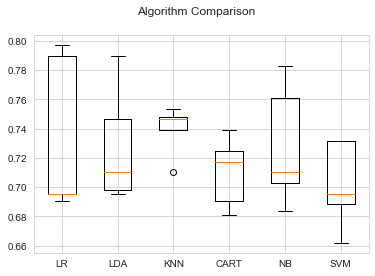

In [74]:
fig = plt.figure()
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

- We can see Mean accuracy score of Logistic regression on the balanced dataset is lower than that of KNNs. But first we need to do some feature scaling on the dataset, as distance based algorithms such as **KNNs** and **Support Vector Machines** may put more weights on the variables with a large range. features with a large range will have a large influence in computing the distance and the model will be more biased. 
- In order to maintain control and ensure no data leakage, we shall use **pipelines**. They operate by enabling a sequence of data to be transformed and correlated together in a model that can be tested and evaluated to achieve an outcome, whether positive or negative.Machine learning pipelines are iterative as every step is repeated to continuously improve the accuracy of the model and achieve a successful algorithm.
- We will create pipelines for different algorithms which include a transformer and finally a classifier.We run the model based on the training data and evaluate them on their mean accuracies like before.

In [75]:
# Standardize the dataset
pipelines = []
pipelines.append(('ScaledLR', Pipeline([('LR', LogisticRegression())])))
pipelines.append(('ScaledLDA', Pipeline([('LDA', LinearDiscriminantAnalysis())])))
pipelines.append(('ScaledKNN', Pipeline([('Scaler', StandardScaler()),('KNN', KNeighborsClassifier())])))
pipelines.append(('ScaledCART', Pipeline([('CART', DecisionTreeClassifier())])))
pipelines.append(('ScaledNB', Pipeline([('NB', GaussianNB())])))
pipelines.append(('ScaledSVM', Pipeline([('Scaler', StandardScaler()),('SVM', SVC())])))
results = []
names = []
for name, model in pipelines:
    kfold = KFold(n_splits=5, shuffle=True, random_state=5)
    cv_results = cross_val_score(model, X_bal_std_train, y_bal_train, cv=kfold, scoring='accuracy')
    results.append(cv_results)
    names.append(name)
#    msg = "%s: %f (%f)" % (name, cv_results.mean()*100, cv_results.std()*100)
#     print(msg)

results_df = pd.DataFrame(results, index=names, \
                          columns='CV1 CV2 CV3 CV4 CV5'.split())
results_df['CV Mean'] = results_df.iloc[:,0:n_splits].mean(axis=1)
results_df['CV Std Dev'] = results_df.iloc[:,0:n_splits].std(axis=1)
results_df.sort_values(by='CV Mean', ascending=False)*100

,CV1,CV2,CV3,CV4,CV5,CV Mean,CV Std Dev
ScaledSVM,73.4,81.2,73.9,86.2,75.4,78.0,5.5
ScaledKNN,79.9,74.6,73.9,79.0,74.6,76.4,2.8
ScaledLR,69.8,76.1,70.3,79.0,70.3,73.1,4.2
ScaledNB,68.3,76.1,70.3,78.3,71.0,72.8,4.2
ScaledLDA,69.8,74.6,71.0,79.0,69.6,72.8,4.0
ScaledCART,66.2,73.2,67.4,73.2,73.9,70.8,3.7


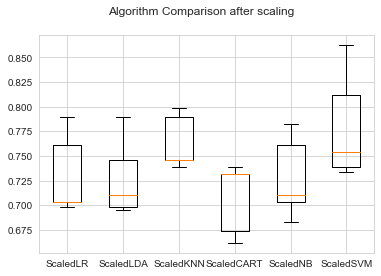

In [76]:
fig = plt.figure()
fig.suptitle('Algorithm Comparison after scaling')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

In [77]:
# ensembles
ensembles = []
ensembles.append(('ScaledAB', Pipeline([('Scaler', StandardScaler()),('AB', AdaBoostClassifier())])))
ensembles.append(('ScaledGBM', Pipeline([('Scaler', StandardScaler()),('GBM', GradientBoostingClassifier())])))  
ensembles.append(('ScaledRF', Pipeline([('Scaler', StandardScaler()),('RF', RandomForestClassifier())])))
results = []
names = []
for name, model in ensembles:
    kfold = KFold(n_splits=5, shuffle=True, random_state=5)
    cv_results = cross_val_score(model, X_bal_std_train, y_bal_train, cv=kfold, scoring='accuracy')
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean()*100, cv_results.std()*100)
#     print(msg)
    
results_df = pd.DataFrame(results, index=names, \
                          columns='CV1 CV2 CV3 CV4 CV5'.split())
results_df['CV Mean'] = results_df.iloc[:,0:n_splits].mean(axis=1)
results_df['CV Std Dev'] = results_df.iloc[:,0:n_splits].std(axis=1)
results_df.sort_values(by='CV Mean', ascending=False)*100

,CV1,CV2,CV3,CV4,CV5,CV Mean,CV Std Dev
ScaledRF,77.0,82.6,76.1,86.2,78.3,80.0,4.3
ScaledGBM,75.5,79.7,75.4,81.9,76.8,77.9,2.8
ScaledAB,70.5,78.3,78.3,81.9,76.1,77.0,4.2


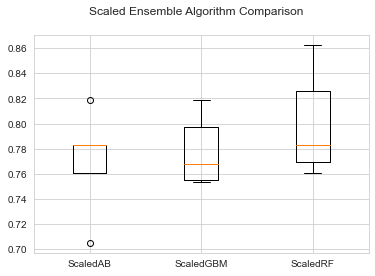

In [78]:
# Compare Algorithms
fig = plt.figure()
fig.suptitle('Scaled Ensemble Algorithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

After standardisation and ensuring all variables are in entire dataset are standardised, we have obtained better scores due to non influence of higher range variables. But we have seen a small increase in the standard deviation or the standard error between all the models. So we need to cautiously choose a model with relatively low std error and high accuracy. We can hence choose the **Support Vector Machines** & **Random Forest** model which also have a higher score than the **KNN** algorithm and see if we can improve its accuracy by hyperparameter tuning.

#### <u>Hyperparameter Tuning</u> 

In [79]:
def analyze_grid_result(grid_result,X_test):
    '''
    Analysis of GridCV result and predicting with test dataset
    Show classification report at last
    '''
    # Best parameters and accuracy
    print("Tuned hyperparameters: (best parameters) ", grid_result.best_params_)
    print("Accuracy :", grid_result.best_score_)
    
    means = grid_result.cv_results_["mean_test_score"]
    stds = grid_result.cv_results_["std_test_score"]
    for mean, std, params in zip(means, stds, grid_result.cv_results_["params"]):
        print("%0.3f (+/-%0.03f) for %r" % (mean, std * 2, params))
    print()
    print("Detailed classification report:")
    y_true, y_pred = y_bal_test, grid_result.predict(X_test)
    print(classification_report(y_true, y_pred))
    print()

In [80]:
#Tune scaled SVM
model_svm = SVC(probability = True)
# Define grid search
tuned_parameters = [
    {"kernel": ["rbf"], "gamma": [1e-3, 1e-4], "C": [1, 10, 100, 1000]},
    {"kernel": ["linear"], "C": [1, 10, 100, 1000]},
]
cv = StratifiedKFold(n_splits = 2, random_state = 1, shuffle = True)
grid_search = GridSearchCV(estimator = model_svm, param_grid = tuned_parameters, cv = cv, scoring = 'accuracy', error_score = 0)
scv_result = grid_search.fit(X_bal_std_train, y_bal_train)
# SVC Hyperparameter Result
analyze_grid_result(scv_result,X_bal_std_test)

Tuned hyperparameters: (best parameters)  {'C': 10, 'gamma': 0.001, 'kernel': 'rbf'}
Accuracy : 0.7352056630644215
0.715 (+/-0.054) for {'C': 1, 'gamma': 0.001, 'kernel': 'rbf'}
0.517 (+/-0.001) for {'C': 1, 'gamma': 0.0001, 'kernel': 'rbf'}
0.735 (+/-0.054) for {'C': 10, 'gamma': 0.001, 'kernel': 'rbf'}
0.718 (+/-0.048) for {'C': 10, 'gamma': 0.0001, 'kernel': 'rbf'}
0.722 (+/-0.034) for {'C': 100, 'gamma': 0.001, 'kernel': 'rbf'}
0.732 (+/-0.054) for {'C': 100, 'gamma': 0.0001, 'kernel': 'rbf'}
0.735 (+/-0.037) for {'C': 1000, 'gamma': 0.001, 'kernel': 'rbf'}
0.722 (+/-0.034) for {'C': 1000, 'gamma': 0.0001, 'kernel': 'rbf'}
0.721 (+/-0.031) for {'C': 1, 'kernel': 'linear'}
0.722 (+/-0.034) for {'C': 10, 'kernel': 'linear'}
0.722 (+/-0.034) for {'C': 100, 'kernel': 'linear'}
0.722 (+/-0.034) for {'C': 1000, 'kernel': 'linear'}

Detailed classification report:
              precision    recall  f1-score   support

           0       0.76      0.75      0.75       160
           1     

In [81]:
#Tune scaled Random Forest
model_rf = RandomForestClassifier(random_state=42)
# Define grid search
tuned_parameters = { 
    'n_estimators': [200, 500],
    'max_features': ['auto', 'sqrt', 'log2'],
    'max_depth' : [4,5,6,7,8],
    'criterion' :['gini', 'entropy']
}
cv = StratifiedKFold(n_splits = 2, random_state = 1, shuffle = True)
grid_search = GridSearchCV(estimator = model_rf, param_grid = tuned_parameters, cv = cv, scoring = 'accuracy', error_score = 0)
rf_result = grid_search.fit(X_bal_train, y_bal_train)
# RF Hyperparameter Result
analyze_grid_result(rf_result,X_bal_test)

Tuned hyperparameters: (best parameters)  {'criterion': 'gini', 'max_depth': 8, 'max_features': 'auto', 'n_estimators': 200}
Accuracy : 0.7916143084527101
0.780 (+/-0.011) for {'criterion': 'gini', 'max_depth': 4, 'max_features': 'auto', 'n_estimators': 200}
0.776 (+/-0.020) for {'criterion': 'gini', 'max_depth': 4, 'max_features': 'auto', 'n_estimators': 500}
0.780 (+/-0.011) for {'criterion': 'gini', 'max_depth': 4, 'max_features': 'sqrt', 'n_estimators': 200}
0.776 (+/-0.020) for {'criterion': 'gini', 'max_depth': 4, 'max_features': 'sqrt', 'n_estimators': 500}
0.777 (+/-0.011) for {'criterion': 'gini', 'max_depth': 4, 'max_features': 'log2', 'n_estimators': 200}
0.776 (+/-0.008) for {'criterion': 'gini', 'max_depth': 4, 'max_features': 'log2', 'n_estimators': 500}
0.773 (+/-0.008) for {'criterion': 'gini', 'max_depth': 5, 'max_features': 'auto', 'n_estimators': 200}
0.776 (+/-0.014) for {'criterion': 'gini', 'max_depth': 5, 'max_features': 'auto', 'n_estimators': 500}
0.773 (+/-0.0

- We have generated the classification reports of both the models after hyperparameter tuning and can see that Random Forest algorithm has a better accuracy than that of SVM. This might be due to the fact that even though dataset is balanced, Random forest performs better in these cases. Let us confirm once again with **ROC AUC** curve.
- **Remote Operating Charactersitics(ROC)** is a probability curve and **Area Under Curve (AUC)** represents the degree or measure of separability. It tells how much the model is capable of distinguishing between classes. *Higher* the AUC, the better the model is at predicting 0 classes as 0 and 1 classes as 1. By analogy, the *higher* the AUC, the better the model is at distinguishing between patients with the disease and no disease.

In [82]:
def roc_auc_curve(outcome):
    """
    Creating a complete ROC-AUC curve 
    
    """
    base_prob = [0 for _ in range(len(y_bal_test))] #Baseline probability line
    svm_proba = scv_result.predict_proba(X_bal_std_test) #SVM probability estimates
    rf_proba = rf_result.predict_proba(X_bal_test) #RF probability estimates
    
    #For ROC-AUC cases on being diabetic
    if outcome == 'Not Diabetic':
        svm_proba = svm_proba[:,0] #Chooses the non diabetic case
        rf_proba = rf_proba[:,0]
    else:
        svm_proba = svm_proba[:,1] #Chooses the diabetic case
        rf_proba = rf_proba[:,1]
    
    #Calculating the roc - auc scores
    base_auc = roc_auc_score(y_bal_test,base_prob)
    svm_auc = roc_auc_score(y_bal_test,svm_proba)
    rf_auc = roc_auc_score(y_bal_test,rf_proba)
    
    #Determining the ROC curve values of True positive rate and False positive rate
    base_fpr, base_tpr, _ = roc_curve(y_bal_test, base_prob)
    svm_fpr, svm_tpr, _ = roc_curve(y_bal_test, svm_proba)
    rf_fpr, rf_tpr, _ = roc_curve(y_bal_test, rf_proba)
 
    #Building and Creating a AUC-Roc curve
    plt.figure(figsize=(15,13))
    plt.plot(base_fpr, base_tpr, linestyle='--', label='Random prediction (AUROC = %0.3f)' % base_auc) #Baseline 
    plt.plot(svm_fpr, svm_tpr, marker='.', label='Support Vector Machines (AUROC = %0.3f)' % svm_auc)  #SVM curve
    plt.plot(rf_fpr, rf_tpr, marker='.', label='Random Forest (AUROC = %0.3f)' % rf_auc) #RF curve
    plt.title('AUC-ROC Plot-%s'%outcome)# Title
    plt.xlabel('False Positive Rate')    # Axis labels
    plt.ylabel('True Positive Rate')     # Axis labels
    plt.legend()  #Show the legend of the the entire  
    plt.show()   # Show plot

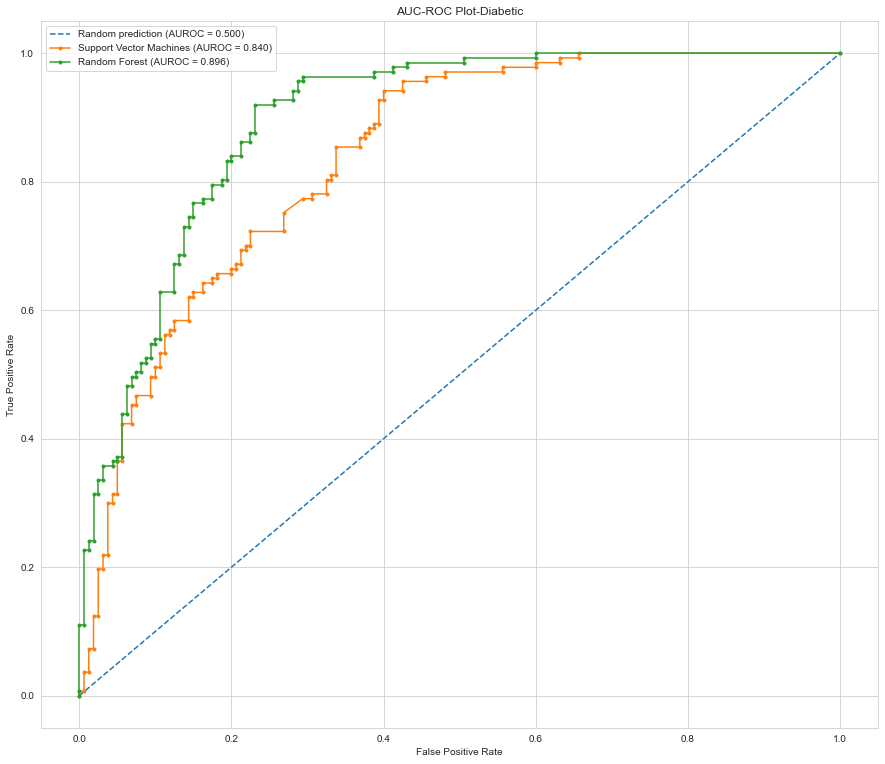

In [83]:
roc_auc_curve('Diabetic') #Plotting for Positive class

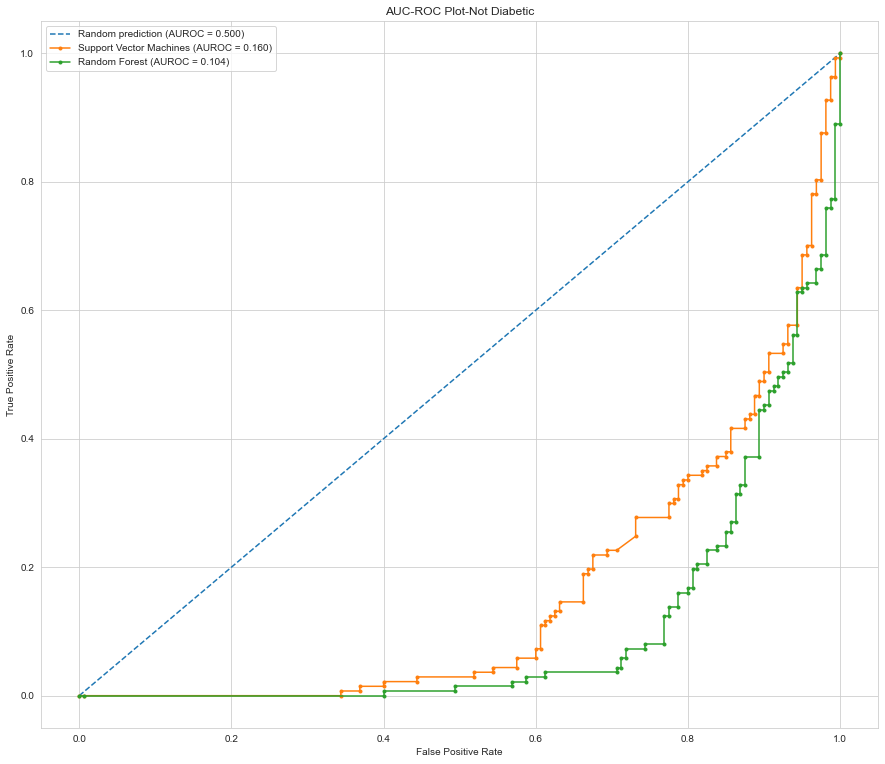

In [84]:
roc_auc_curve('Not Diabetic') #Plotting for the negative class

- We can observe that Random Forest has a very higher True positve rate a better AUC score (~0.9) than Support vector machines. As a thumb rule, AUC of at least 0.7 is rewuired for practical application of the model. The blue dotted line  represents a classifier that is no better than random guessing — this will plot as a diagonal line. Specificity and sensitivity are inversely proportional to each other, hence the two figures makes sense as the class 0  will be identified and predicted distinctly from class 1.  
- Hence after analysing the poerformance metrics of both the models, we ascertained that based on the comparison of accuracies of both the models, we choose the **Random forest Classifier** which have 78% accuracy.This might be due to SVM with **`rbf`** kernel model makes the assumption that the optimal decision boundary is smooth and rotation invariant (once you fix a specific feature scaling that is not rotation invariant). The Random Forest on the other hand, does not make the smoothness assumption (it's a piece wise constant prediction function) and favors axis aligned decision boundaries. This makes it a weel suited model to do the task

## <u>Predictions</u>🔮

Now that we have finalised on a particular model, lets use the current model to predict the outcome of diabetes on the entire dataset. Luckily since random forest doesnt required any standardisation, we can directly predict the test set without any preprocessing.

In [85]:
model = rf_result.best_estimator_
predictions = model.predict(X_bal)

In [86]:
X_bal['Outcome'] = y_bal
X_bal['Prediction'] = predictions

In [87]:
X_bal.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome,Prediction
0,6,148.0,72.0,35.0,36.0,33.6,0.6,50,1,1
1,1,85.0,66.0,29.0,36.0,26.6,0.4,31,0,0
2,8,183.0,64.0,20.7,36.0,23.3,0.7,32,1,1
3,1,89.0,66.0,23.0,94.0,28.1,0.2,21,0,0
4,0,137.0,40.0,35.0,168.0,43.1,2.3,33,1,1


Lets now save all the new data into a new csv which can be used for further steps ahead. The csv shall now be used to present intuitive visualisations from the dashboard on tableau. We can also save the model as a pickle file which can be used for future stakeholders. Link:https://public.tableau.com/app/profile/ruben1001/viz/Project-Healthcarediabetes/Dashboard1?publish=yes

In [88]:
#Saving the predicted dataset to a directory
X_bal.to_excel('C:/Users/ruben/OneDrive/Documents/Python_DS/Projects/Healthcare_diabetes/diabetes_pred.xlsx',index= False)

Before we save the model into a pickle file, it is good practice to fit the entire dataset to the model so as it becomes a better classifier with higher accuracy.

In [89]:
#Drop predictions column
X_bal = X_bal.drop(labels='Prediction',axis = 1)
X_bal = X_bal.drop(labels='Outcome',axis = 1)
X_bal.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,6,148.0,72.0,35.0,36.0,33.6,0.6,50
1,1,85.0,66.0,29.0,36.0,26.6,0.4,31
2,8,183.0,64.0,20.7,36.0,23.3,0.7,32
3,1,89.0,66.0,23.0,94.0,28.1,0.2,21
4,0,137.0,40.0,35.0,168.0,43.1,2.3,33


In [90]:
#fit the data to the model
model = model.fit(X_bal.values,y_bal.values)

In [91]:
#Saving the model to a directory
dump(model,'C:/Users/ruben/OneDrive/Documents/Python_DS/Projects/Healthcare_diabetes/random_forest.pkl')

['C:/Users/ruben/OneDrive/Documents/Python_DS/Projects/Healthcare_diabetes/random_forest.pkl']

## <u>Conclusions</u>🗞️

Machine  learning  has  the  great  ability  to revolutionize  the  diabetes  risk  prediction  with  the help  of  advanced  computational  methods  and availability  of large  amount of  epidemiological and genetic diabetes risk dataset. Detection of diabetes in its early stages is the key for treatment. This work has described a machine learning approach to  predicting diabetes  levels.  The  technique  may  also  help researchers to develop an accurate and effective tool that will reach at the table of clinicians to help them make better decision about the disease status. Some of the key points which we have analysed:
- Patients with high levels of glucose need to be watchful as they are more prones to being diabetic. **Exercise** is a fast and effective way to lower your blood sugar levels as it makes your body more sensitive to insulin.Physical activity causes the body to demand glucose for energy. As a result, the cells deliver glucose to the muscles and blood sugar levels usually drop.
- Patients with high BMI have a slight possibility to be diabetic mostly type 2 diabetic. **Cut out high calorie drinks** as they are high in sugar or calories are another major cause of weight gain. Keep these beverages to a minimum, and drink more water. This will not only help maintain your BMI, but it will keep you better hydrated as well since many high-calorie drinks actually dehydrate you. Increase fruit and vegetable intake, decrease harmful fats, and you’ll be able to maintain your BMI while also enjoying more energy and better organ function.
- Patients who have a family history of hereditary diabetes needs to be watchful as well as they are also more prone to being diabetic. Maintaining a diet chart, exercising, managing stress levels, keeping blood pressure under control, etc will surely help mitigate the possibility of diabetes.

<p>Finally a Machine leaning model is chosen to predict the occurence of diabetes based on the certain factors. Note that since the data has been unbalanced, oversampling has been done for the minority class so as to ensure we get an unbiased, generalized estimator.</p>  